## 1- First Imported Needed Libraries

In [2]:
import tensorflow as tf      
import matplotlib.pyplot as plt    
import numpy as np
%matplotlib inline 
tf.compat.v1.disable_eager_execution()
np.random.seed(101)
tf.compat.v1.set_random_seed(101)
## Generating Linear Algebra Data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 
# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 
n = len(x) # Number of data points

## 2- Plotting My Data 


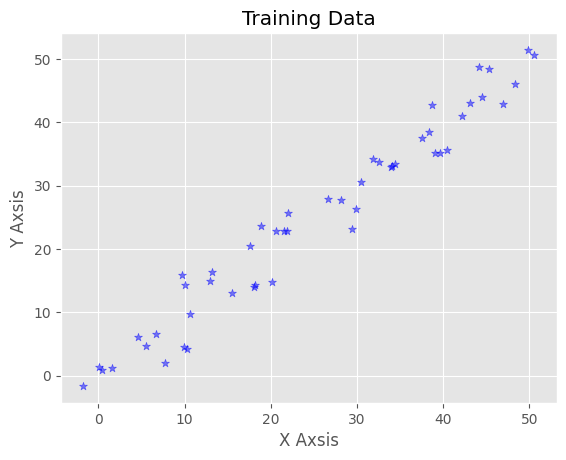

In [9]:
# Plot of Training Data 
plt.style.use('ggplot')
ax=plt.axes()
ax.set(xlabel = 'X Axsis', ylabel = 'Y Axsis' , title = 'Training Data')
plt.scatter(x, y, marker = '*',color = 'blue' ,alpha=0.5,label='Training Data') 
plt.show()

## 3 - Make GDO

In [11]:
X = tf.compat.v1.placeholder("float") 
Y = tf.compat.v1.placeholder("float") 
W = tf.Variable(np.random.randn()) 
b = tf.Variable(np.random.randn())
#I Need Known Value Of W & B
with tf.compat.v1.Session() as s1 : 
    s1.run(tf.compat.v1.global_variables_initializer())
    print('the value Of W is ==> ',s1.run(W))
    print('The Value Of B is ==> ',s1.run(b))
s1.close()
learning_rate = 0.01
training_epochs = 1000
# Hypothesis Eguation
y_pred = tf.add(tf.multiply(X, W), b) # W * X + b
# Mean Squared Error Cost Function 
cost = tf.compat.v1.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) ## (h(0) - y) ^2  /  2 *m 
# Gradient Descent Optimizer 
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

the value Of W is ==>  -1.467514
The Value Of B is ==>  -0.49409536


## 4- Starting Tensorflow Session 

In [23]:
with tf.compat.v1.Session() as sess: 
# Initializing the Variables 
	sess.run(tf.compat.v1.global_variables_initializer()) 
	# Iterating through all the epochs 
	for epoch in range(training_epochs): 
	# Feeding each data point into the optimizer using Feed Dictionary 
		for (_x, _y) in zip(x, y): 
			sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 	
		# Displaying the result after every 50 epochs 
		if (epoch + 1) % 50 == 0: # Calculating the cost a every epoch 
			c = sess.run(cost, feed_dict = {X : x, Y : y}) 
			print("Epoch ", (epoch + 1), ": cost Function Is ==> ", c, "  \tand \t  W Values Is ==> ", sess.run(W), "  and  \t b Values Is ==> ", sess.run(b)) 
	# Storing necessary values to be used outside the Session 
	training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
	weight = sess.run(W) 
	bias = sess.run(b)
#Finally Calccluate The Predictions Values 
print('=='*30)
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')
sess.close()

Epoch  50 : cost Function Is ==>  5.2335815   	and 	  W Values Is ==>  1.0273161   and  	 b Values Is ==>  -0.33595607
Epoch  100 : cost Function Is ==>  5.2369714   	and 	  W Values Is ==>  1.0268768   and  	 b Values Is ==>  -0.31447834
Epoch  150 : cost Function Is ==>  5.24013   	and 	  W Values Is ==>  1.0264845   and  	 b Values Is ==>  -0.2952952
Epoch  200 : cost Function Is ==>  5.243056   	and 	  W Values Is ==>  1.0261341   and  	 b Values Is ==>  -0.2781603
Epoch  250 : cost Function Is ==>  5.245749   	and 	  W Values Is ==>  1.0258211   and  	 b Values Is ==>  -0.26285738
Epoch  300 : cost Function Is ==>  5.2482195   	and 	  W Values Is ==>  1.0255415   and  	 b Values Is ==>  -0.24918896
Epoch  350 : cost Function Is ==>  5.25048   	and 	  W Values Is ==>  1.0252919   and  	 b Values Is ==>  -0.2369803
Epoch  400 : cost Function Is ==>  5.2525396   	and 	  W Values Is ==>  1.0250689   and  	 b Values Is ==>  -0.22607571
Epoch  450 : cost Function Is ==>  5.254413   	and

## 5- Plotting Data 

C:\Users\Alhou\AppData\Local\Temp\ipykernel_17764\3653087791.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, 'ro', label ='Original data',color = 'blue')


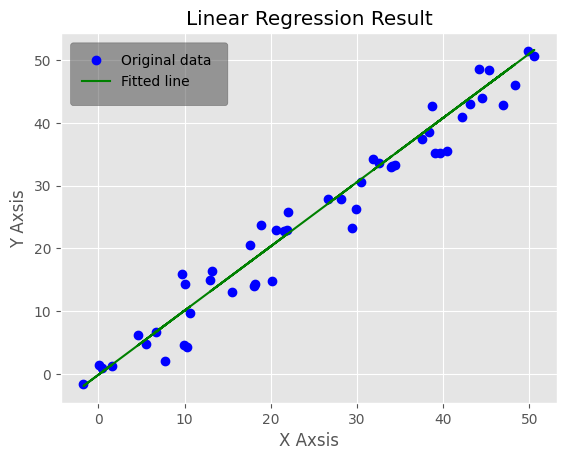

In [25]:
# Plotting the Results 
plt.style.use('ggplot')
ax=plt.axes()
ax.set(xlabel='X Axsis',ylabel='Y Axsis', title= 'Linear Regression Result')
plt.plot(x, y, 'ro', label ='Original data',color = 'blue') 
plt.plot(x, predictions, label ='Fitted line',color = 'green') 
ax.legend(loc='upper left',frameon=True,shadow=True,fancybox=True,framealpha=0,borderpad=1) 
plt.show()